In [1]:
import os
import sys
import pandas as pd
from pathlib import Path
import numpy as np
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_DIR = "data"
data_files = [str(filePath) for filePath in Path(DATA_DIR).glob("**/*") if filePath.is_file()]
data_labels = ['Debtor', 'Invoice', 'Payments']
data_dict = {data_labels[i]: pd.read_csv(data_files[i]) for i in range(len(data_labels))}

In [3]:
data_dict['Debtor']

,CustomerKey,PostcodeOuter
0,16721147,B11
1,16721148,DN31
2,16721154,BA11
3,16721165,IP18
4,16721166,B79
...,...,...
88094,16987538,HU12
88095,16987539,S3
88096,16987540,FK1
88097,16989241,PE2


In [4]:
data_dict['Invoice'] = data_dict['Invoice'][data_dict['Invoice']['IsCreditInvoice'] == 0]

In [5]:
invoice_counts = data_dict['Invoice'].groupby(by='CustomerKey').count().reset_index()

In [6]:
invoice_counts

,CustomerKey,InvoiceKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate
0,16721148,12,12,12,12,12,12,12,12
1,16721154,11,11,11,11,11,11,11,11
2,16721165,10,10,10,10,10,10,10,10
3,16721166,12,12,12,12,12,12,12,12
4,16721167,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...
83409,16985436,1,1,1,1,1,1,1,1
83410,16985437,1,1,1,1,1,1,1,1
83411,16985454,1,1,1,1,1,1,1,1
83412,16985495,1,1,1,1,1,1,1,1


In [7]:
# 1 invoice customers
one_inv = invoice_counts[invoice_counts['InvoiceKey'] == 1]

In [8]:
one_invoice_customers = data_dict['Invoice'][data_dict['Invoice']['CustomerKey'].isin(one_inv['CustomerKey'])]

In [9]:
one_invoice_customers

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate
114,197180221,16730547,0,2018-01-10,2018-02-09,1302.00,0.0,INV,2020-09-18 16:21:06.333
169,195460806,16883658,0,2018-01-16,2018-02-15,992.64,0.0,INV,2020-09-18 16:21:06.333
392,196453572,16740297,0,2018-01-30,2018-03-02,1268.95,0.0,INV,2020-09-18 16:21:06.333
403,195494589,16965487,0,2018-01-31,2018-02-28,1477.68,0.0,INV,2020-09-18 16:21:06.333
454,195459901,16741610,0,2018-01-31,2018-02-28,536.70,0.0,INV,2020-09-18 16:21:06.333
...,...,...,...,...,...,...,...,...,...
1008923,196372918,16984327,0,2019-06-30,2019-07-30,106.57,0.0,INV,2020-09-18 16:21:06.333
1008924,196372924,16984065,0,2019-06-30,2019-07-30,173.66,0.0,INV,2020-09-18 16:21:06.333
1008934,196372940,16984359,0,2019-06-30,2019-07-30,189.70,0.0,INV,2020-09-18 16:21:06.333
1009141,196872110,16984962,0,2019-06-30,2019-07-30,82.02,0.0,INV,2020-09-18 16:21:06.333


In [10]:
one_invoice_customers.describe()

,InvoiceKey,CustomerKey,IsCreditInvoice,OriginalInvoiceAmount,AmountOutstanding
count,1.668700e+04,1.668700e+04,16687.0,16687.000000,16687.000000
mean,1.964513e+08,1.690148e+07,0.0,318.741535,0.220804
std,6.187980e+05,4.752821e+04,0.0,6202.310101,10.384465
min,1.951377e+08,1.672163e+07,0.0,0.030000,0.000000
25%,1.960537e+08,1.689338e+07,0.0,45.780000,0.000000
50%,1.964466e+08,1.689917e+07,0.0,45.780000,0.000000
75%,1.970671e+08,1.691156e+07,0.0,45.780000,0.000000
max,1.973559e+08,1.698552e+07,0.0,527412.800000,720.360000


In [11]:
one_invoice_customers = pd.merge(one_invoice_customers, data_dict['Payments'], on = ['InvoiceKey', 'CustomerKey'], how='left')
one_invoice_customers

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate,PaymentValue,PaymentDate,PaymentType
0,197180221,16730547,0,2018-01-10,2018-02-09,1302.00,0.0,INV,2020-09-18 16:21:06.333,NaN,NaN,NaN
1,195460806,16883658,0,2018-01-16,2018-02-15,992.64,0.0,INV,2020-09-18 16:21:06.333,105.84,2018-09-24,Barclays Multi
2,196453572,16740297,0,2018-01-30,2018-03-02,1268.95,0.0,INV,2020-09-18 16:21:06.333,1268.95,2018-10-10,Barclays Multi
3,195494589,16965487,0,2018-01-31,2018-02-28,1477.68,0.0,INV,2020-09-18 16:21:06.333,NaN,NaN,NaN
4,195459901,16741610,0,2018-01-31,2018-02-28,536.70,0.0,INV,2020-09-18 16:21:06.333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,196372918,16984327,0,2019-06-30,2019-07-30,106.57,0.0,INV,2020-09-18 16:21:06.333,106.57,2019-10-17,Barclays Multi
16708,196372924,16984065,0,2019-06-30,2019-07-30,173.66,0.0,INV,2020-09-18 16:21:06.333,173.66,2019-07-22,CheckM8
16709,196372940,16984359,0,2019-06-30,2019-07-30,189.70,0.0,INV,2020-09-18 16:21:06.333,NaN,NaN,NaN
16710,196872110,16984962,0,2019-06-30,2019-07-30,82.02,0.0,INV,2020-09-18 16:21:06.333,NaN,NaN,NaN


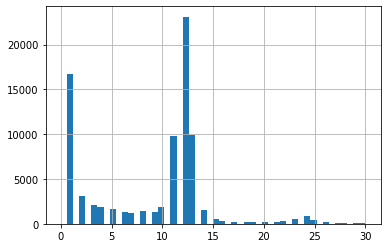

In [12]:
num_invoices_hist = invoice_counts['InvoiceKey'].hist(bins=50, range=[0, 30])
num_invoices_hist

how many customers paid ?

In [13]:
data_dict['Payments']

,InvoiceKey,CustomerKey,PaymentValue,PaymentDate,PaymentType
0,196327726,16909966,137.82,2018-08-31,Barclays Multi
1,195354898,16758142,123.05,2020-09-15,Barclays Multi
2,196819246,16758142,145.76,2020-09-15,Barclays Multi
3,196385894,16765211,1149.72,2020-09-15,Barclays Multi
4,197226397,16907262,39.94,2020-09-15,Barclays Multi
...,...,...,...,...,...
549743,195439402,16836504,78.16,2018-08-31,Barclays Multi
549744,197095238,16772250,1771.79,2018-08-31,Barclays Multi
549745,195527079,16802894,41.89,2018-08-31,Barclays Multi
549746,195695090,16965351,1377.00,2018-08-31,Barclays Multi


In [14]:
data_dict['Payments'].groupby(by='CustomerKey').count().reset_index()

,CustomerKey,InvoiceKey,PaymentValue,PaymentDate,PaymentType
0,16721154,17,17,17,17
1,16721167,18,18,18,18
2,16721173,4,4,4,4
3,16721203,16,16,16,16
4,16721207,36,36,36,36
...,...,...,...,...,...
28530,16988953,1,1,1,1
28531,16988957,1,1,1,1
28532,16988983,1,1,1,1
28533,16988990,3,3,3,3


In [15]:
df = pd.merge(data_dict['Invoice'], data_dict['Payments'], on = ['InvoiceKey', 'CustomerKey'], how='left')

In [16]:
df

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate,PaymentValue,PaymentDate,PaymentType
0,195398038,16732292,0,2018-01-02,2018-02-01,485.04,0.0,INV,2020-09-18 16:21:06.333,NaN,NaN,NaN
1,196501155,16875354,0,2018-01-02,2018-01-02,46.08,0.0,CSH,2020-09-18 16:21:06.333,NaN,NaN,NaN
2,197118804,16742684,0,2018-01-02,2018-03-02,138.34,0.0,INV,2020-09-18 16:21:06.333,NaN,NaN,NaN
3,195519971,16745090,0,2018-01-03,2018-03-02,168.00,0.0,INV,2020-09-18 16:21:06.333,168.00,2018-11-23,Barclays Multi
4,195719609,16745645,0,2018-01-04,2018-02-28,7020.19,0.0,INV,2020-09-18 16:21:06.333,7020.19,2019-05-15,Barclays Multi
...,...,...,...,...,...,...,...,...,...,...,...,...
955209,196341240,16971160,0,2019-06-30,2019-07-30,130.56,0.0,INV,2020-09-18 16:21:06.333,130.56,2019-07-24,CheckM8
955210,196341244,16829160,0,2019-06-30,2019-07-30,63.60,0.0,INV,2020-09-18 16:21:06.333,NaN,NaN,NaN
955211,196341411,16764236,0,2019-06-30,2019-07-30,15.00,0.0,INV,2020-09-18 16:21:06.333,15.00,2019-07-08,Barclays Multi
955212,196341507,16832368,0,2019-06-30,2019-07-30,74.76,0.0,INV,2020-09-18 16:21:06.333,74.76,2019-07-15,CheckM8


In [17]:
# customers who have more than 1 payment on the same invoice
multi_payment = df[df.groupby('InvoiceKey')['InvoiceKey'].transform('size') > 1]
multi_payment

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate,PaymentValue,PaymentDate,PaymentType
241,196750593,16889316,0,2018-01-31,2018-02-28,121.32,0.0,INV,2020-09-18 16:21:06.333,58.48,2018-10-23,Barclays Multi
242,196750593,16889316,0,2018-01-31,2018-02-28,121.32,0.0,INV,2020-09-18 16:21:06.333,62.84,2018-10-02,Barclays Multi
291,195318426,16911267,0,2018-01-31,2018-02-28,2322.84,0.0,INV,2020-09-18 16:21:06.333,822.84,2019-06-10,Barclays Multi
292,195318426,16911267,0,2018-01-31,2018-02-28,2322.84,0.0,INV,2020-09-18 16:21:06.333,500.00,2019-04-01,Barclays Multi
293,195318426,16911267,0,2018-01-31,2018-02-28,2322.84,0.0,INV,2020-09-18 16:21:06.333,500.00,2019-02-21,Barclays Multi
...,...,...,...,...,...,...,...,...,...,...,...,...
953089,196139086,16876991,0,2019-06-30,2019-07-30,453.50,0.0,INV,2020-09-18 16:21:06.333,0.50,2019-09-20,Barclays Multi
953090,196139086,16876991,0,2019-06-30,2019-07-30,453.50,0.0,INV,2020-09-18 16:21:06.333,453.00,2019-08-16,Barclays Multi
954968,197281911,16858058,0,2019-06-30,2019-07-30,8191.55,0.0,INV,2020-09-18 16:21:06.333,2327.34,2019-07-30,Barclays Multi
954969,197281911,16858058,0,2019-06-30,2019-07-30,8191.55,0.0,INV,2020-09-18 16:21:06.333,5000.00,2019-07-22,Barclays Multi


In [18]:
multi_payment['PaymentDate'] = pd.to_datetime(multi_payment['PaymentDate'])

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
multi_payment['EarliestPaymentDate'] = multi_payment.groupby('InvoiceKey')['PaymentDate'].transform('min')

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
multi_payment['NumPayments'] = 1

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
multi_payment['AveragePaymentValue'] = multi_payment['PaymentValue']

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
multi_payment

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate,PaymentValue,PaymentDate,PaymentType,EarliestPaymentDate,NumPayments,AveragePaymentValue
241,196750593,16889316,0,2018-01-31,2018-02-28,121.32,0.0,INV,2020-09-18 16:21:06.333,58.48,2018-10-23,Barclays Multi,2018-10-02,1,58.48
242,196750593,16889316,0,2018-01-31,2018-02-28,121.32,0.0,INV,2020-09-18 16:21:06.333,62.84,2018-10-02,Barclays Multi,2018-10-02,1,62.84
291,195318426,16911267,0,2018-01-31,2018-02-28,2322.84,0.0,INV,2020-09-18 16:21:06.333,822.84,2019-06-10,Barclays Multi,2019-01-15,1,822.84
292,195318426,16911267,0,2018-01-31,2018-02-28,2322.84,0.0,INV,2020-09-18 16:21:06.333,500.00,2019-04-01,Barclays Multi,2019-01-15,1,500.00
293,195318426,16911267,0,2018-01-31,2018-02-28,2322.84,0.0,INV,2020-09-18 16:21:06.333,500.00,2019-02-21,Barclays Multi,2019-01-15,1,500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953089,196139086,16876991,0,2019-06-30,2019-07-30,453.50,0.0,INV,2020-09-18 16:21:06.333,0.50,2019-09-20,Barclays Multi,2019-08-16,1,0.50
953090,196139086,16876991,0,2019-06-30,2019-07-30,453.50,0.0,INV,2020-09-18 16:21:06.333,453.00,2019-08-16,Barclays Multi,2019-08-16,1,453.00
954968,197281911,16858058,0,2019-06-30,2019-07-30,8191.55,0.0,INV,2020-09-18 16:21:06.333,2327.34,2019-07-30,Barclays Multi,2019-07-19,1,2327.34
954969,197281911,16858058,0,2019-06-30,2019-07-30,8191.55,0.0,INV,2020-09-18 16:21:06.333,5000.00,2019-07-22,Barclays Multi,2019-07-19,1,5000.00


In [23]:
# aggregate into one invoice for multiple payments
inv_aggregated = multi_payment.groupby(by=['InvoiceKey', 'CustomerKey']).agg({'PaymentValue':'sum', 
                                                            'PaymentDate':'max', 
                                                            'PaymentType':lambda x: x.mode(),
                                                             'EarliestPaymentDate':'min',
                                                            'NumPayments':'count',
                                                                'AveragePaymentValue':'mean'  }).reset_index()


In [24]:
inv_aggregated

,InvoiceKey,CustomerKey,PaymentValue,PaymentDate,PaymentType,EarliestPaymentDate,NumPayments,AveragePaymentValue
0,195137960,16983152,294.38,2019-06-18,Barclays Multi,2019-06-17,2,147.190
1,195144470,16879427,704.10,2019-08-07,Barclays Multi,2019-07-05,2,352.050
2,195149801,16880287,90.23,2019-05-30,Barclays Multi,2019-03-15,2,45.115
3,195149930,16737780,2157.01,2018-12-03,Barclays Multi,2018-10-15,2,1078.505
4,195152072,16759952,490.49,2018-10-15,Barclays Multi,2018-10-10,2,245.245
...,...,...,...,...,...,...,...,...
1442,197352873,16965086,323.40,2018-09-20,Barclays Multi,2018-08-31,2,161.700
1443,197353767,16888874,46.98,2019-04-15,Barclays Multi,2019-01-16,2,23.490
1444,197354760,16860416,64018.92,2019-01-30,Barclays Multi,2019-01-29,2,32009.460
1445,197355877,16863289,2433.60,2019-04-11,CheckM8,2019-04-11,4,608.400


In [25]:
origCols = [col for col in list(multi_payment.columns) if col not in ['PaymentValue', 'PaymentDate', 'PaymentType', 'EarliestPaymentDate', 'NumPayments', 'AveragePaymentValue']]

In [26]:
origCols

['InvoiceKey',
 'CustomerKey',
 'IsCreditInvoice',
 'RaisedDate',
 'DueDate',
 'OriginalInvoiceAmount',
 'AmountOutstanding',
 'StatementTransactionType',
 'ExtractDate']

In [27]:
# remove duplicates and join with inv_aggregated
multi_payment_processed = pd.merge(multi_payment[origCols].drop_duplicates(subset=['InvoiceKey', 'CustomerKey'], keep='last')
                                   ,inv_aggregated, on = ['InvoiceKey', 'CustomerKey'])

In [28]:
multi_payment_processed

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate,PaymentValue,PaymentDate,PaymentType,EarliestPaymentDate,NumPayments,AveragePaymentValue
0,196750593,16889316,0,2018-01-31,2018-02-28,121.32,0.00,INV,2020-09-18 16:21:06.333,121.32,2018-10-23,Barclays Multi,2018-10-02,2,60.660000
1,195318426,16911267,0,2018-01-31,2018-02-28,2322.84,0.00,INV,2020-09-18 16:21:06.333,2322.84,2019-06-10,Barclays Multi,2019-01-15,4,580.710000
2,196193230,16917910,0,2018-02-19,2018-03-21,335.40,0.00,INV,2020-09-18 16:21:06.333,307.40,2019-04-26,Barclays Multi,2018-11-05,5,61.480000
3,196327142,16890270,0,2018-02-28,2018-03-30,73.04,0.00,INV,2020-09-18 16:21:06.333,41.09,2018-10-24,Barclays Multi,2018-09-24,2,20.545000
4,197351239,16859739,0,2018-02-28,2018-03-30,2183.44,441.97,INV,2020-09-18 16:21:06.333,750.00,2020-08-18,Barclays Multi,2020-04-22,3,250.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,197180083,16736256,0,2019-06-30,2019-07-30,646.42,0.00,INV,2020-09-18 16:21:06.333,646.42,2019-10-09,Barclays Multi,2019-09-16,2,323.210000
1443,196871858,16917308,0,2019-06-30,2019-07-30,72.62,0.00,INV,2020-09-18 16:21:06.333,72.62,2019-08-09,Barclays Multi,2019-07-29,2,36.310000
1444,195891626,16782671,0,2019-06-30,2019-07-30,311.44,0.00,INV,2020-09-18 16:21:06.333,622.88,2019-09-18,CheckM8,2019-07-22,2,311.440000
1445,196139086,16876991,0,2019-06-30,2019-07-30,453.50,0.00,INV,2020-09-18 16:21:06.333,453.50,2019-09-20,Barclays Multi,2019-08-16,2,226.750000


In [29]:
df = pd.concat([df[df.groupby('InvoiceKey')['InvoiceKey'].transform('size') <= 1], multi_payment_processed])

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [30]:
# now every invoice key is unique
len(df['InvoiceKey'].unique())

953015

In [31]:
df

,AmountOutstanding,AveragePaymentValue,CustomerKey,DueDate,EarliestPaymentDate,ExtractDate,InvoiceKey,IsCreditInvoice,NumPayments,OriginalInvoiceAmount,PaymentDate,PaymentType,PaymentValue,RaisedDate,StatementTransactionType
0,0.0,NaN,16732292,2018-02-01,NaT,2020-09-18 16:21:06.333,195398038,0,NaN,485.04,NaN,NaN,NaN,2018-01-02,INV
1,0.0,NaN,16875354,2018-01-02,NaT,2020-09-18 16:21:06.333,196501155,0,NaN,46.08,NaN,NaN,NaN,2018-01-02,CSH
2,0.0,NaN,16742684,2018-03-02,NaT,2020-09-18 16:21:06.333,197118804,0,NaN,138.34,NaN,NaN,NaN,2018-01-02,INV
3,0.0,NaN,16745090,2018-03-02,NaT,2020-09-18 16:21:06.333,195519971,0,NaN,168.00,2018-11-23,Barclays Multi,168.00,2018-01-03,INV
4,0.0,NaN,16745645,2018-02-28,NaT,2020-09-18 16:21:06.333,195719609,0,NaN,7020.19,2019-05-15,Barclays Multi,7020.19,2018-01-04,INV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,0.0,323.210000,16736256,2019-07-30,2019-09-16,2020-09-18 16:21:06.333,197180083,0,2.0,646.42,2019-10-09 00:00:00,Barclays Multi,646.42,2019-06-30,INV
1443,0.0,36.310000,16917308,2019-07-30,2019-07-29,2020-09-18 16:21:06.333,196871858,0,2.0,72.62,2019-08-09 00:00:00,Barclays Multi,72.62,2019-06-30,INV
1444,0.0,311.440000,16782671,2019-07-30,2019-07-22,2020-09-18 16:21:06.333,195891626,0,2.0,311.44,2019-09-18 00:00:00,CheckM8,622.88,2019-06-30,INV
1445,0.0,226.750000,16876991,2019-07-30,2019-08-16,2020-09-18 16:21:06.333,196139086,0,2.0,453.50,2019-09-20 00:00:00,Barclays Multi,453.50,2019-06-30,INV


In [32]:
# % of invoices not paid
len(df[df['PaymentValue'].isna()])/len(df)

0.6319711651967702

Exclude outliers, and customers with <= 10 invoices

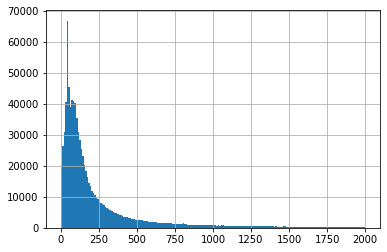

In [33]:
df['OriginalInvoiceAmount'].hist(bins=200, range=[0, 2000])

Invoice level New Feature Engineering

In [34]:
len(df[df['OriginalInvoiceAmount'] <= 2000]) / len(df)

0.9457616092086694

In [35]:
df.dtypes

AmountOutstanding                  float64
AveragePaymentValue                float64
CustomerKey                          int64
DueDate                             object
EarliestPaymentDate         datetime64[ns]
ExtractDate                         object
InvoiceKey                           int64
IsCreditInvoice                      int64
NumPayments                        float64
OriginalInvoiceAmount              float64
PaymentDate                         object
PaymentType                         object
PaymentValue                       float64
RaisedDate                          object
StatementTransactionType            object
dtype: object

In [36]:
# keep invoice amounts <= 2000
# keep nums per invoice 

df = df[df['OriginalInvoiceAmount'] <= 2000.0]


In [37]:
df

,AmountOutstanding,AveragePaymentValue,CustomerKey,DueDate,EarliestPaymentDate,ExtractDate,InvoiceKey,IsCreditInvoice,NumPayments,OriginalInvoiceAmount,PaymentDate,PaymentType,PaymentValue,RaisedDate,StatementTransactionType
0,0.0,NaN,16732292,2018-02-01,NaT,2020-09-18 16:21:06.333,195398038,0,NaN,485.04,NaN,NaN,NaN,2018-01-02,INV
1,0.0,NaN,16875354,2018-01-02,NaT,2020-09-18 16:21:06.333,196501155,0,NaN,46.08,NaN,NaN,NaN,2018-01-02,CSH
2,0.0,NaN,16742684,2018-03-02,NaT,2020-09-18 16:21:06.333,197118804,0,NaN,138.34,NaN,NaN,NaN,2018-01-02,INV
3,0.0,NaN,16745090,2018-03-02,NaT,2020-09-18 16:21:06.333,195519971,0,NaN,168.00,2018-11-23,Barclays Multi,168.00,2018-01-03,INV
5,0.0,NaN,16743947,2018-02-03,NaT,2020-09-18 16:21:06.333,196442471,0,NaN,819.60,2018-10-26,Barclays Multi,819.60,2018-01-04,INV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,0.0,178.165,16847651,2019-07-30,2019-09-24,2020-09-18 16:21:06.333,195362531,0,2.0,356.33,2019-10-07 00:00:00,Barclays Multi,356.33,2019-06-30,INV
1442,0.0,323.210,16736256,2019-07-30,2019-09-16,2020-09-18 16:21:06.333,197180083,0,2.0,646.42,2019-10-09 00:00:00,Barclays Multi,646.42,2019-06-30,INV
1443,0.0,36.310,16917308,2019-07-30,2019-07-29,2020-09-18 16:21:06.333,196871858,0,2.0,72.62,2019-08-09 00:00:00,Barclays Multi,72.62,2019-06-30,INV
1444,0.0,311.440,16782671,2019-07-30,2019-07-22,2020-09-18 16:21:06.333,195891626,0,2.0,311.44,2019-09-18 00:00:00,CheckM8,622.88,2019-06-30,INV


In [38]:
# remove all invoices that haven't been paid
df.dropna(subset=['PaymentDate', 'PaymentType', 'PaymentValue'], inplace=True)

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
grouped_by_customer = df.groupby(by='CustomerKey').count().reset_index()
grouped_by_customer = grouped_by_customer[grouped_by_customer['InvoiceKey'] >= 10]
grouped_by_customer

,CustomerKey,AmountOutstanding,AveragePaymentValue,DueDate,EarliestPaymentDate,ExtractDate,InvoiceKey,IsCreditInvoice,NumPayments,OriginalInvoiceAmount,PaymentDate,PaymentType,PaymentValue,RaisedDate,StatementTransactionType
0,16721154,11,0,11,0,11,11,11,0,11,11,11,11,11,11
1,16721167,12,0,12,0,12,12,12,0,12,12,12,12,12,12
3,16721203,12,0,12,0,12,12,12,0,12,12,12,12,12,12
4,16721207,24,0,24,0,24,24,24,0,24,24,24,24,24,24
5,16721212,11,0,11,0,11,11,11,0,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23894,16980240,22,0,22,0,22,22,22,0,22,22,22,22,22,22
23900,16980268,16,0,16,0,16,16,16,0,16,16,16,16,16,16
23921,16980375,62,0,62,0,62,62,62,0,62,62,62,62,62,62
23933,16980435,12,0,12,0,12,12,12,0,12,12,12,12,12,12


In [40]:
df = df[df['CustomerKey'].isin(grouped_by_customer['CustomerKey'])]

In [41]:
df

,AmountOutstanding,AveragePaymentValue,CustomerKey,DueDate,EarliestPaymentDate,ExtractDate,InvoiceKey,IsCreditInvoice,NumPayments,OriginalInvoiceAmount,PaymentDate,PaymentType,PaymentValue,RaisedDate,StatementTransactionType
3,0.0,NaN,16745090,2018-03-02,NaT,2020-09-18 16:21:06.333,195519971,0,NaN,168.00,2018-11-23,Barclays Multi,168.00,2018-01-03,INV
5,0.0,NaN,16743947,2018-02-03,NaT,2020-09-18 16:21:06.333,196442471,0,NaN,819.60,2018-10-26,Barclays Multi,819.60,2018-01-04,INV
15,0.0,NaN,16836264,2018-02-08,NaT,2020-09-18 16:21:06.333,196563186,0,NaN,749.40,2018-11-05,Barclays Multi,718.20,2018-01-09,INV
22,0.0,NaN,16843107,2018-03-02,NaT,2020-09-18 16:21:06.333,196711370,0,NaN,1873.08,2018-09-04,Barclays Multi,1873.08,2018-01-11,INV
24,0.0,NaN,16739410,2018-02-11,NaT,2020-09-18 16:21:06.333,197134638,0,NaN,1316.09,2018-09-26,Barclays Multi,1316.09,2018-01-12,INV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,0.0,24.815,16849111,2019-07-30,2019-07-30,2020-09-18 16:21:06.333,196911580,0,2.0,49.63,2019-08-30 00:00:00,Barclays Multi,49.63,2019-06-30,INV
1440,0.0,178.165,16847651,2019-07-30,2019-09-24,2020-09-18 16:21:06.333,195362531,0,2.0,356.33,2019-10-07 00:00:00,Barclays Multi,356.33,2019-06-30,INV
1443,0.0,36.310,16917308,2019-07-30,2019-07-29,2020-09-18 16:21:06.333,196871858,0,2.0,72.62,2019-08-09 00:00:00,Barclays Multi,72.62,2019-06-30,INV
1444,0.0,311.440,16782671,2019-07-30,2019-07-22,2020-09-18 16:21:06.333,195891626,0,2.0,311.44,2019-09-18 00:00:00,CheckM8,622.88,2019-06-30,INV


In [42]:
# fill NumPayments with 1 
df['NumPayments'] = df['NumPayments'].fillna(1)

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
df

,AmountOutstanding,AveragePaymentValue,CustomerKey,DueDate,EarliestPaymentDate,ExtractDate,InvoiceKey,IsCreditInvoice,NumPayments,OriginalInvoiceAmount,PaymentDate,PaymentType,PaymentValue,RaisedDate,StatementTransactionType
3,0.0,NaN,16745090,2018-03-02,NaT,2020-09-18 16:21:06.333,195519971,0,1.0,168.00,2018-11-23,Barclays Multi,168.00,2018-01-03,INV
5,0.0,NaN,16743947,2018-02-03,NaT,2020-09-18 16:21:06.333,196442471,0,1.0,819.60,2018-10-26,Barclays Multi,819.60,2018-01-04,INV
15,0.0,NaN,16836264,2018-02-08,NaT,2020-09-18 16:21:06.333,196563186,0,1.0,749.40,2018-11-05,Barclays Multi,718.20,2018-01-09,INV
22,0.0,NaN,16843107,2018-03-02,NaT,2020-09-18 16:21:06.333,196711370,0,1.0,1873.08,2018-09-04,Barclays Multi,1873.08,2018-01-11,INV
24,0.0,NaN,16739410,2018-02-11,NaT,2020-09-18 16:21:06.333,197134638,0,1.0,1316.09,2018-09-26,Barclays Multi,1316.09,2018-01-12,INV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,0.0,24.815,16849111,2019-07-30,2019-07-30,2020-09-18 16:21:06.333,196911580,0,2.0,49.63,2019-08-30 00:00:00,Barclays Multi,49.63,2019-06-30,INV
1440,0.0,178.165,16847651,2019-07-30,2019-09-24,2020-09-18 16:21:06.333,195362531,0,2.0,356.33,2019-10-07 00:00:00,Barclays Multi,356.33,2019-06-30,INV
1443,0.0,36.310,16917308,2019-07-30,2019-07-29,2020-09-18 16:21:06.333,196871858,0,2.0,72.62,2019-08-09 00:00:00,Barclays Multi,72.62,2019-06-30,INV
1444,0.0,311.440,16782671,2019-07-30,2019-07-22,2020-09-18 16:21:06.333,195891626,0,2.0,311.44,2019-09-18 00:00:00,CheckM8,622.88,2019-06-30,INV


In [44]:
# remove all invoices that haven't been paid
df.dropna(subset=['PaymentDate', 'PaymentType', 'PaymentValue'], inplace=True)


C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
df.reset_index(inplace=True, drop=True)

In [46]:
df

,AmountOutstanding,AveragePaymentValue,CustomerKey,DueDate,EarliestPaymentDate,ExtractDate,InvoiceKey,IsCreditInvoice,NumPayments,OriginalInvoiceAmount,PaymentDate,PaymentType,PaymentValue,RaisedDate,StatementTransactionType
0,0.0,NaN,16745090,2018-03-02,NaT,2020-09-18 16:21:06.333,195519971,0,1.0,168.00,2018-11-23,Barclays Multi,168.00,2018-01-03,INV
1,0.0,NaN,16743947,2018-02-03,NaT,2020-09-18 16:21:06.333,196442471,0,1.0,819.60,2018-10-26,Barclays Multi,819.60,2018-01-04,INV
2,0.0,NaN,16836264,2018-02-08,NaT,2020-09-18 16:21:06.333,196563186,0,1.0,749.40,2018-11-05,Barclays Multi,718.20,2018-01-09,INV
3,0.0,NaN,16843107,2018-03-02,NaT,2020-09-18 16:21:06.333,196711370,0,1.0,1873.08,2018-09-04,Barclays Multi,1873.08,2018-01-11,INV
4,0.0,NaN,16739410,2018-02-11,NaT,2020-09-18 16:21:06.333,197134638,0,1.0,1316.09,2018-09-26,Barclays Multi,1316.09,2018-01-12,INV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272237,0.0,24.815,16849111,2019-07-30,2019-07-30,2020-09-18 16:21:06.333,196911580,0,2.0,49.63,2019-08-30 00:00:00,Barclays Multi,49.63,2019-06-30,INV
272238,0.0,178.165,16847651,2019-07-30,2019-09-24,2020-09-18 16:21:06.333,195362531,0,2.0,356.33,2019-10-07 00:00:00,Barclays Multi,356.33,2019-06-30,INV
272239,0.0,36.310,16917308,2019-07-30,2019-07-29,2020-09-18 16:21:06.333,196871858,0,2.0,72.62,2019-08-09 00:00:00,Barclays Multi,72.62,2019-06-30,INV
272240,0.0,311.440,16782671,2019-07-30,2019-07-22,2020-09-18 16:21:06.333,195891626,0,2.0,311.44,2019-09-18 00:00:00,CheckM8,622.88,2019-06-30,INV


In [47]:
# for one payment invoices, fill in nans with paymentDate, same with averagepaymentvalue
df['EarliestPaymentDate'] = df['EarliestPaymentDate'].fillna(df['PaymentDate'])
df['AveragePaymentValue'] = df['AveragePaymentValue'].fillna(df['PaymentValue'])

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
df.reset_index(drop=True, inplace=True)

In [49]:
df

,AmountOutstanding,AveragePaymentValue,CustomerKey,DueDate,EarliestPaymentDate,ExtractDate,InvoiceKey,IsCreditInvoice,NumPayments,OriginalInvoiceAmount,PaymentDate,PaymentType,PaymentValue,RaisedDate,StatementTransactionType
0,0.0,168.000,16745090,2018-03-02,2018-11-23,2020-09-18 16:21:06.333,195519971,0,1.0,168.00,2018-11-23,Barclays Multi,168.00,2018-01-03,INV
1,0.0,819.600,16743947,2018-02-03,2018-10-26,2020-09-18 16:21:06.333,196442471,0,1.0,819.60,2018-10-26,Barclays Multi,819.60,2018-01-04,INV
2,0.0,718.200,16836264,2018-02-08,2018-11-05,2020-09-18 16:21:06.333,196563186,0,1.0,749.40,2018-11-05,Barclays Multi,718.20,2018-01-09,INV
3,0.0,1873.080,16843107,2018-03-02,2018-09-04,2020-09-18 16:21:06.333,196711370,0,1.0,1873.08,2018-09-04,Barclays Multi,1873.08,2018-01-11,INV
4,0.0,1316.090,16739410,2018-02-11,2018-09-26,2020-09-18 16:21:06.333,197134638,0,1.0,1316.09,2018-09-26,Barclays Multi,1316.09,2018-01-12,INV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272237,0.0,24.815,16849111,2019-07-30,2019-07-30 00:00:00,2020-09-18 16:21:06.333,196911580,0,2.0,49.63,2019-08-30 00:00:00,Barclays Multi,49.63,2019-06-30,INV
272238,0.0,178.165,16847651,2019-07-30,2019-09-24 00:00:00,2020-09-18 16:21:06.333,195362531,0,2.0,356.33,2019-10-07 00:00:00,Barclays Multi,356.33,2019-06-30,INV
272239,0.0,36.310,16917308,2019-07-30,2019-07-29 00:00:00,2020-09-18 16:21:06.333,196871858,0,2.0,72.62,2019-08-09 00:00:00,Barclays Multi,72.62,2019-06-30,INV
272240,0.0,311.440,16782671,2019-07-30,2019-07-22 00:00:00,2020-09-18 16:21:06.333,195891626,0,2.0,311.44,2019-09-18 00:00:00,CheckM8,622.88,2019-06-30,INV


In [50]:
df.drop(columns=['IsCreditInvoice', 'ExtractDate', 'AmountOutstanding'], inplace=True)

C:\Users\Andy\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
df

,AveragePaymentValue,CustomerKey,DueDate,EarliestPaymentDate,InvoiceKey,NumPayments,OriginalInvoiceAmount,PaymentDate,PaymentType,PaymentValue,RaisedDate,StatementTransactionType
0,168.000,16745090,2018-03-02,2018-11-23,195519971,1.0,168.00,2018-11-23,Barclays Multi,168.00,2018-01-03,INV
1,819.600,16743947,2018-02-03,2018-10-26,196442471,1.0,819.60,2018-10-26,Barclays Multi,819.60,2018-01-04,INV
2,718.200,16836264,2018-02-08,2018-11-05,196563186,1.0,749.40,2018-11-05,Barclays Multi,718.20,2018-01-09,INV
3,1873.080,16843107,2018-03-02,2018-09-04,196711370,1.0,1873.08,2018-09-04,Barclays Multi,1873.08,2018-01-11,INV
4,1316.090,16739410,2018-02-11,2018-09-26,197134638,1.0,1316.09,2018-09-26,Barclays Multi,1316.09,2018-01-12,INV
...,...,...,...,...,...,...,...,...,...,...,...,...
272237,24.815,16849111,2019-07-30,2019-07-30 00:00:00,196911580,2.0,49.63,2019-08-30 00:00:00,Barclays Multi,49.63,2019-06-30,INV
272238,178.165,16847651,2019-07-30,2019-09-24 00:00:00,195362531,2.0,356.33,2019-10-07 00:00:00,Barclays Multi,356.33,2019-06-30,INV
272239,36.310,16917308,2019-07-30,2019-07-29 00:00:00,196871858,2.0,72.62,2019-08-09 00:00:00,Barclays Multi,72.62,2019-06-30,INV
272240,311.440,16782671,2019-07-30,2019-07-22 00:00:00,195891626,2.0,311.44,2019-09-18 00:00:00,CheckM8,622.88,2019-06-30,INV


In [52]:
df.rename(columns={"PaymentValue": "TotalPaymentValue", "PaymentDate": "LatestPaymentDate"}, inplace=True)

C:\Users\Andy\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [53]:
df.to_csv(path_or_buf='./Engineered_Data/data.csv', index=False)